<a href="https://colab.research.google.com/github/Saurav-Raghaw/Optimization/blob/main/Experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import numpy as np

In [3]:
def func(x1, x2):
  return 0.1*x1**2 + 2* x2**2

In [4]:
def grad_func_x1(x1):
  return 0.2*x1

In [5]:
def grad_func_x2(x2):
  return 4*x2

#ADAM Optimizers

In [6]:
def Adam_Otimizer(lr=0.05):
  x1, x2 = -10, -10 #parameters
  beta_1 = 0.9
  beta_2 = 0.999	
  eps = 1e-8

  log = [] # lists to store learning process

  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, vt_x1, mt_x2, vt_x2 = 0,0,0,0
  mt_cap_x1, vt_cap_x1, mt_cap_x2, vt_cap_x2 = 0,0,0,0

  t=0

  while(1):     #till it converges
     t = t+1

     grad_x1 = grad_func_x1(x1)
     grad_x2 = grad_func_x2(x2)

     mt_x1 = beta_1*mt_x1 + (1 - beta_1)*grad_x1
     vt_x1 = beta_2*vt_x1 + (1 - beta_2)*(grad_x1**2)

     mt_cap_x1 = mt_x1/(1 - beta_1**t)
     vt_cap_x1 = vt_x1/(1 - beta_2**t)
     
     mt_x2 = beta_1*mt_x2 + (1 - beta_1)*grad_x2
     vt_x2 = beta_2*vt_x2 + (1 - beta_2)*(grad_x2**2)

     mt_cap_x2 = mt_x2/(1 - beta_1**t)
     vt_cap_x2 = vt_x2/(1 - beta_2**t)

     log.append((x1, x2))

     x1_prev = x1
     x2_prev = x2

     x1 = x1 - (lr*mt_cap_x1)/math.sqrt(vt_cap_x1 + eps)
     x2 = x2 - (lr*mt_cap_x2)/math.sqrt(vt_cap_x2 + eps)

     if(x1_prev == x1 and x2_prev == x2):
       break
  
  return x1, x2, log

In [7]:
x1, x2, log = Adam_Otimizer(lr=0.01)

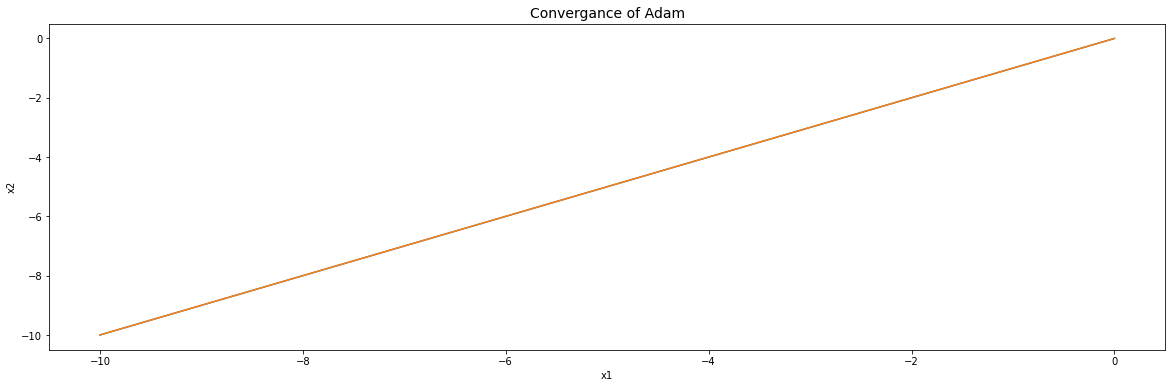

CPU times: user 163 ms, sys: 5.48 ms, total: 169 ms
Wall time: 174 ms


In [8]:
%%time
x_val = [l[0] for l in log]
y_val = [l[1] for l in log]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('Convergance of Adam', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val,y_val)
plt.plot(x_val,y_val)

plt.show()

<Figure size 3405x908 with 0 Axes>

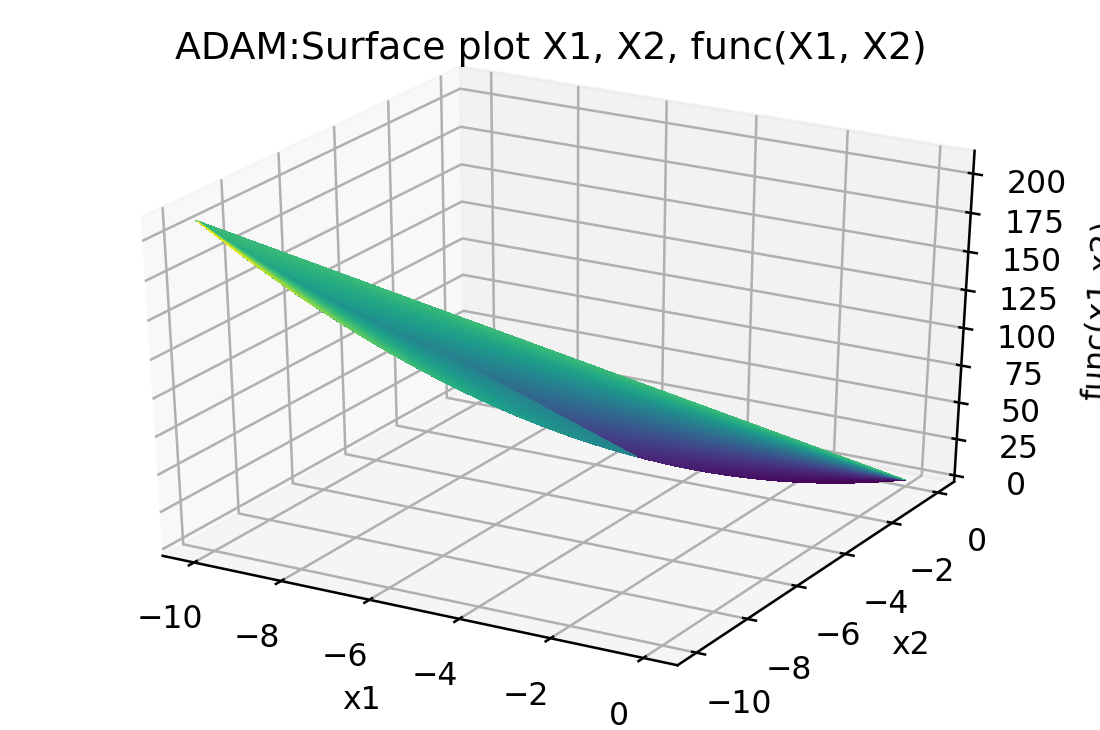

In [9]:
x_val = [l[0] for l in log]
y_val = [l[1] for l in log]

plt.figure(figsize=(15,4))
costs = np.array([func(x_val, y_val) for x_val, y_val in zip(x_val, y_val)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(x_val, y_val, costs, linewidth=0.1, antialiased=False,cmap='viridis', edgecolor='none')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('func(x1,x2)')

ax.set_title('ADAM:Surface plot X1, X2, func(X1, X2)')

plt.show()

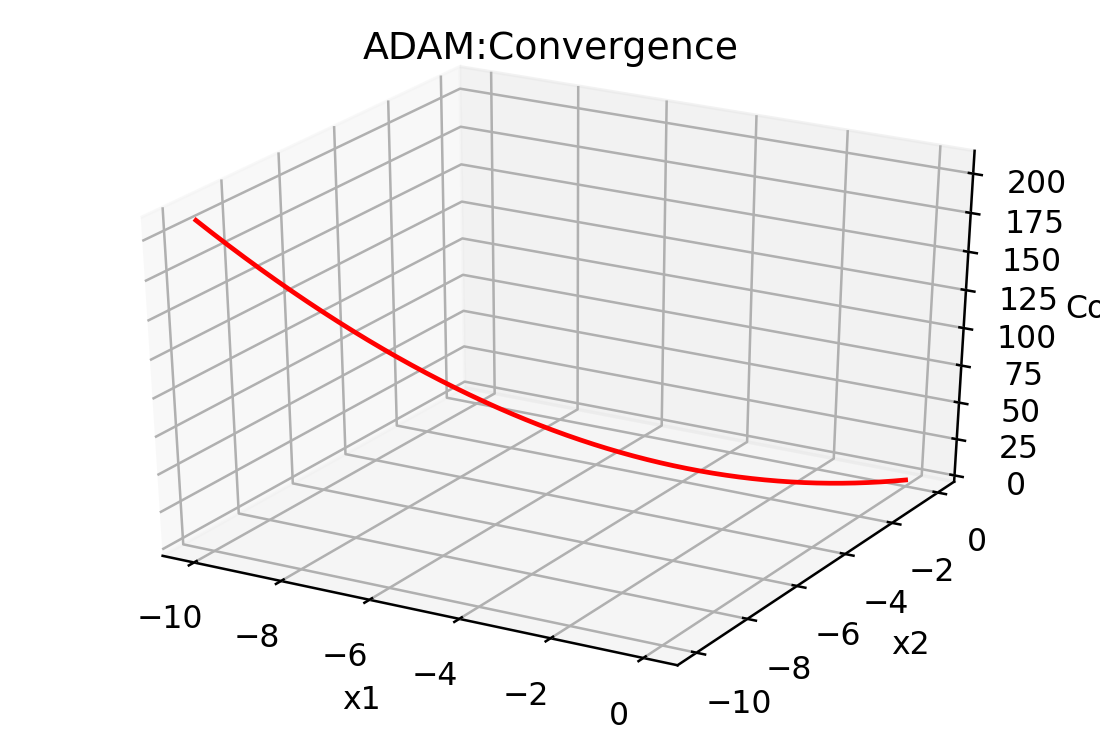

CPU times: user 341 ms, sys: 225 ms, total: 566 ms
Wall time: 329 ms


In [10]:
%%time
x_val = [l[0] for l in log]
y_val = [l[1] for l in log]

costs = np.array([func(x_val, y_val) for x_val, y_val in zip(x_val, y_val)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot_trisurf(x_val, y_val, costs, linewidth=0.1, antialiased=True,cmap='viridis', edgecolor='none')


ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Cost')

ax.set_title('ADAM:Convergence')
ax.plot(x_val, y_val,costs, color='red')

plt.show()

#PID Optimizers

In [11]:
def PID_Otimizer(lr=0.05, Kd=0.9):
  x1, x2 = -10, -10 #parameters
  gamma = 0.9	

  log = [] # lists to store learning process

  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, dt_x1, mt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_mt_x1, prev_mt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  t=0

  while(1):
    t=t+1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)

    mt_x1 = gamma*prev_mt_x1 + lr*grad_x1
    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(grad_x1 - prev_grad_x1)

    prev_mt_x1 = mt_x1
    prev_dt_x1 = dt_x1
    prev_grad_x1 = grad_x1

    mt_x2 = gamma*prev_mt_x2 + lr*grad_x2
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(grad_x2 - prev_grad_x2)

    prev_mt_x2 = mt_x2
    prev_dt_x2 = dt_x2
    prev_grad_x2 = grad_x2

    log.append((x1,x2))

    x1_prev = x1
    x2_prev = x2

    x1 = x1 - mt_x1 - Kd*dt_x1
    x2 = x2 - mt_x2 - Kd*dt_x2

    if(x1_prev == x1 and x2_prev == x2):
      break

  return x1, x2, log

#Long loops for small value of Kd?? Need to ponder.

In [12]:
x1, x2, log1 = PID_Otimizer(lr=0.01, Kd=4) #Tried with Kd=2,3,4 problem after Kd>=5 and Kd<0.8
x1, x2, log2 = PID_Otimizer(lr=0.01, Kd=3)
x1, x2, log3 = PID_Otimizer(lr=0.01, Kd=1)
x1, x2, log4 = PID_Otimizer(lr=0.01, Kd=0.9)
x1, x2, log5 = PID_Otimizer(lr=0.01, Kd=0.8)

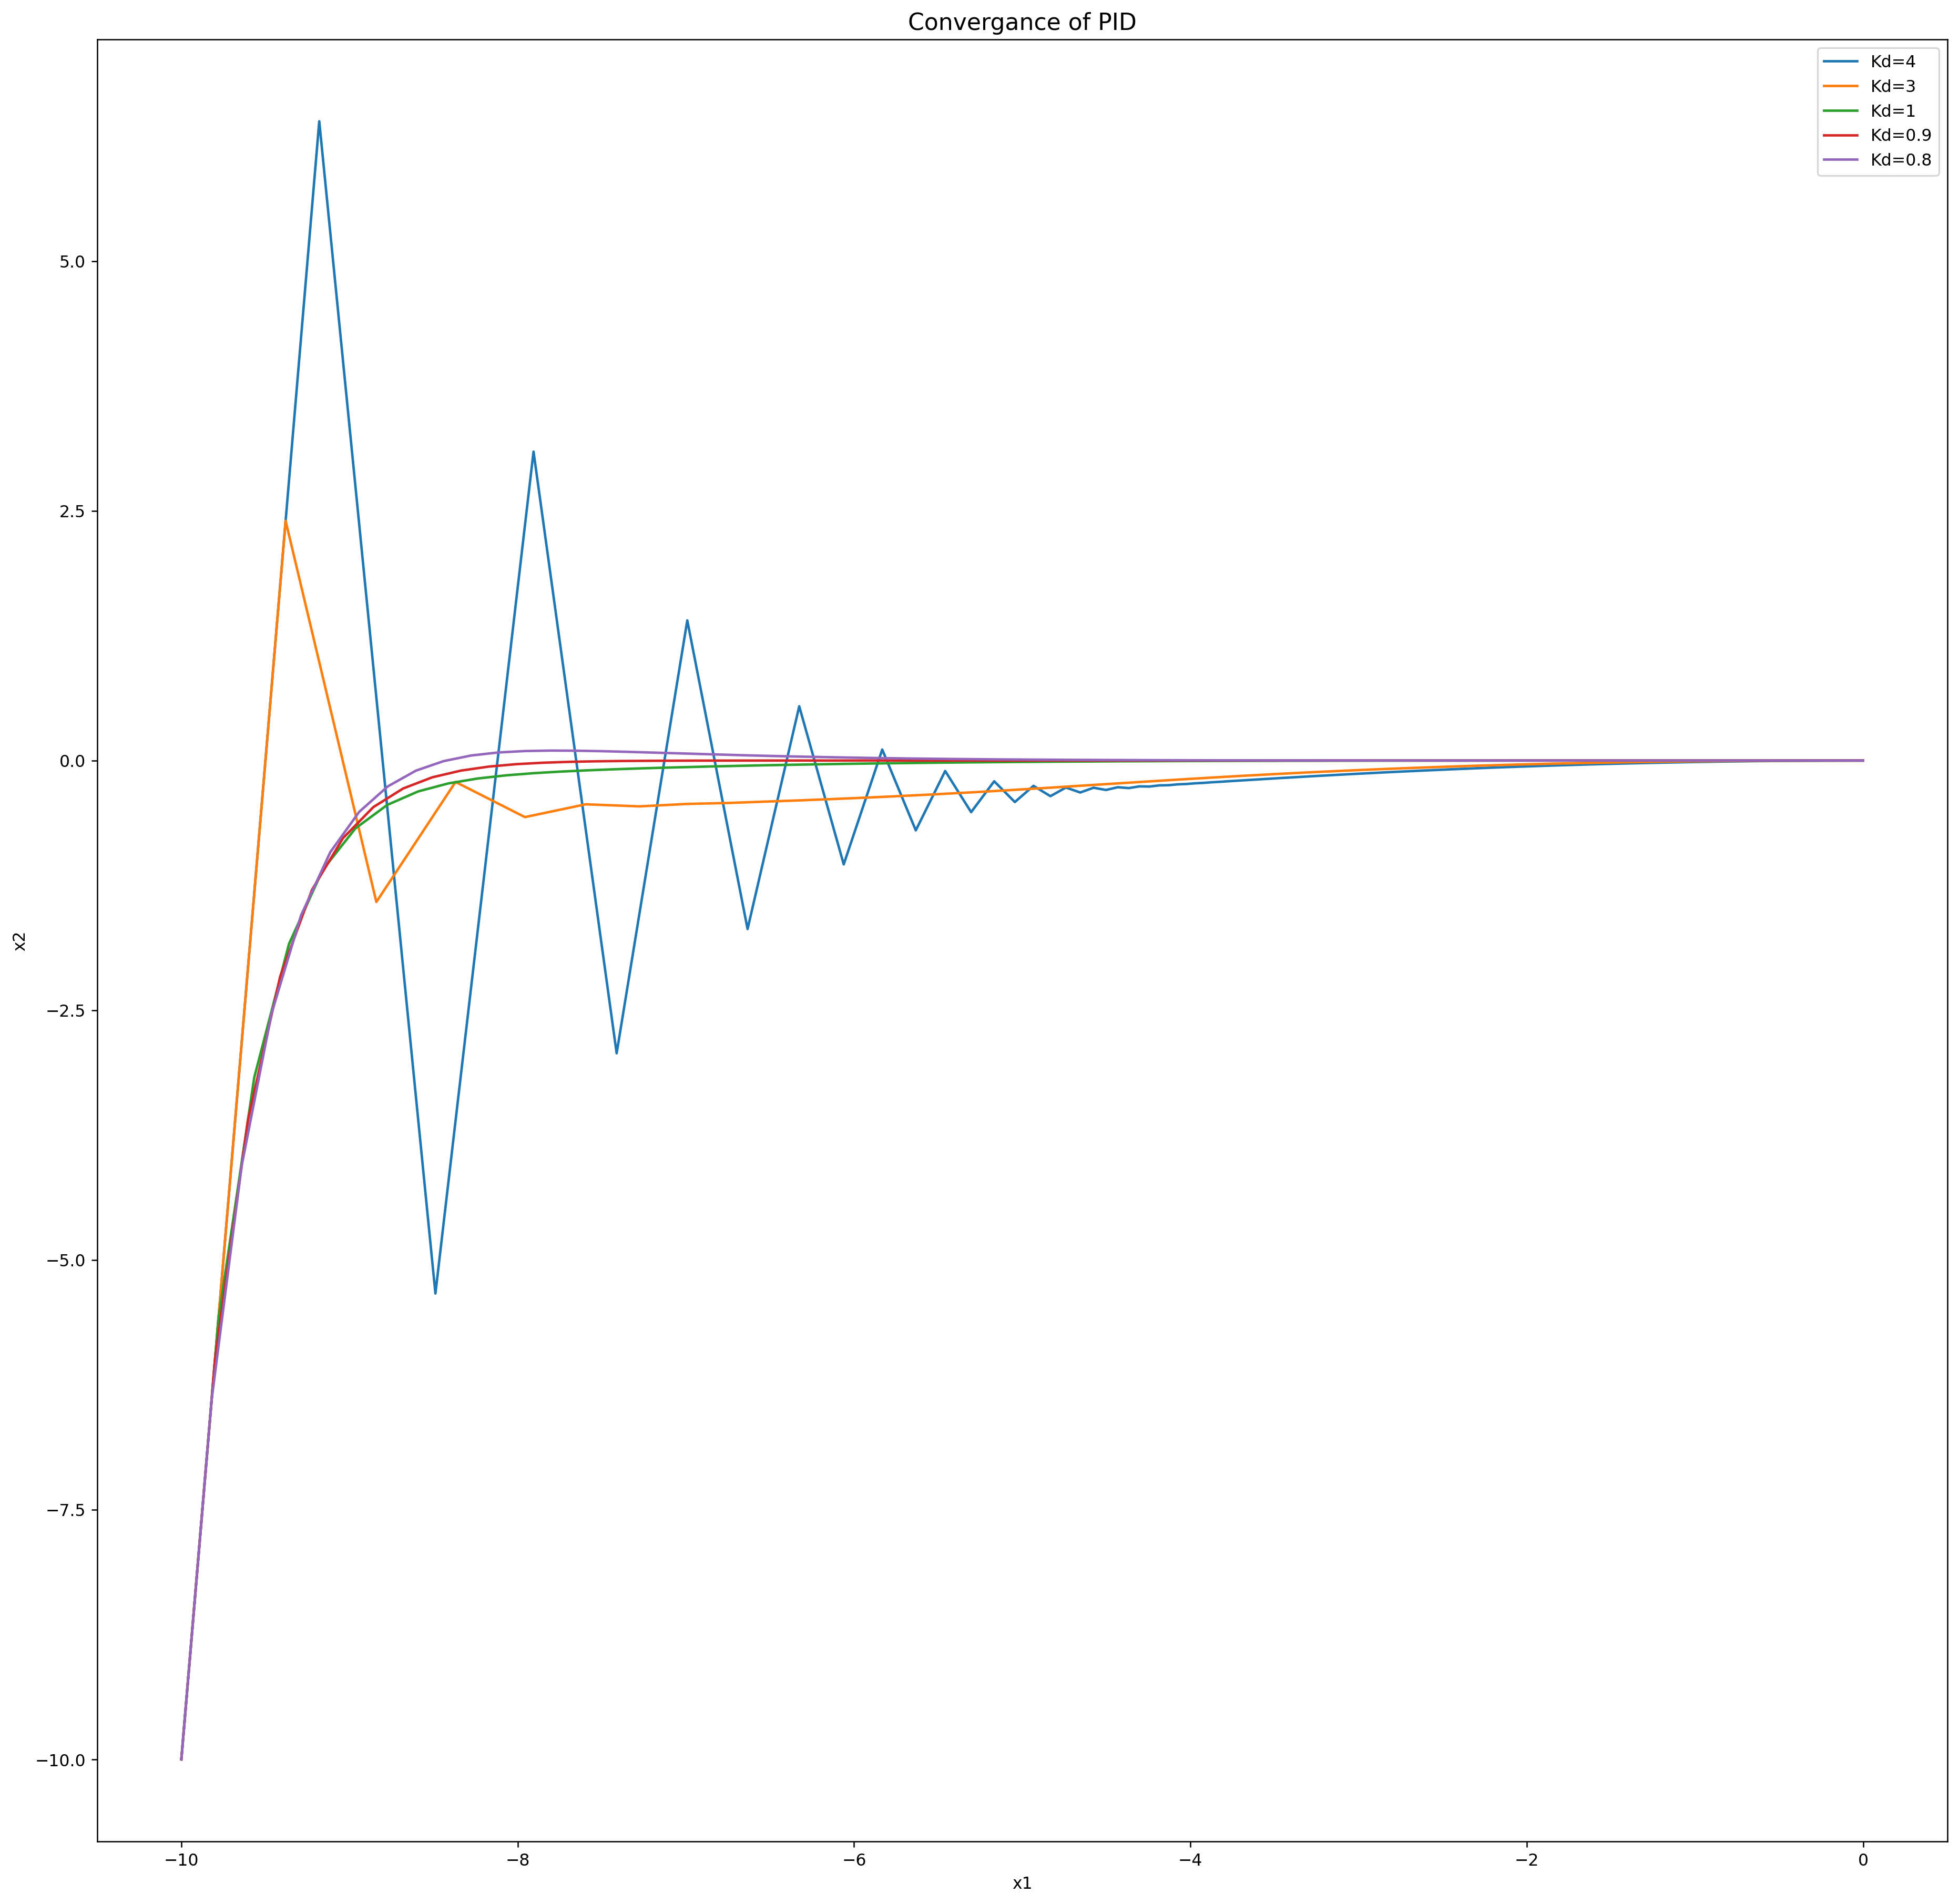

CPU times: user 1.76 s, sys: 78.3 ms, total: 1.83 s
Wall time: 1.84 s


In [13]:
%%time
x_val1 = [l[0] for l in log1]
y_val1 = [l[1] for l in log1]

x_val2 = [l[0] for l in log2]
y_val2 = [l[1] for l in log2]

x_val3 = [l[0] for l in log3]
y_val3 = [l[1] for l in log3]

x_val4 = [l[0] for l in log4]
y_val4 = [l[1] for l in log4]

x_val5 = [l[0] for l in log5]
y_val5 = [l[1] for l in log5]

plt.figure(figsize=(20,20))
plt.rcParams['figure.dpi'] = 227

plt.title('Convergance of PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val1,y_val1, label='Kd=4')
plt.plot(x_val2,y_val2, label = 'Kd=3')
plt.plot(x_val3,y_val3, label = 'Kd=1')
plt.plot(x_val4,y_val4, label = 'Kd=0.9')
plt.plot(x_val5,y_val5, label = 'Kd=0.8')
plt.legend()

plt.show()

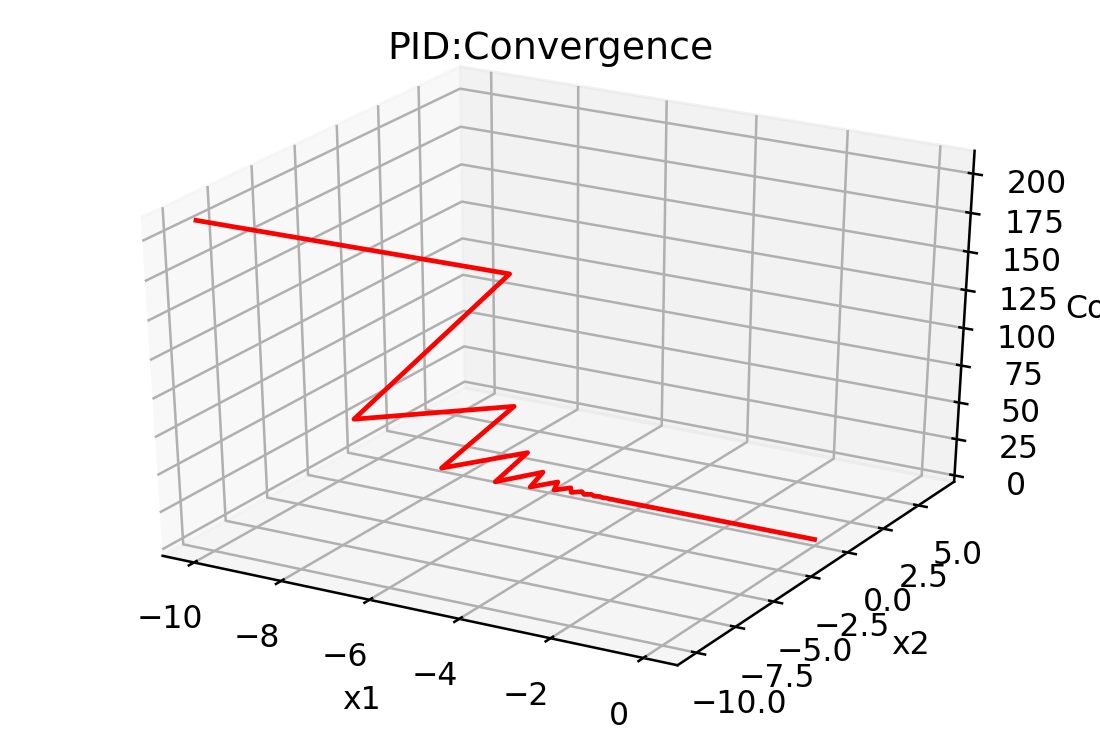

CPU times: user 487 ms, sys: 223 ms, total: 711 ms
Wall time: 490 ms


In [14]:
%%time
x_val1 = [l[0] for l in log1]
y_val1= [l[1] for l in log1]

costs1 = np.array([func(x_val1, y_val1) for x_val1, y_val1 in zip(x_val1, y_val1)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot_trisurf(x_val1, y_val1, costs1, linewidth=0.1, antialiased=True,cmap='viridis', edgecolor='none')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Cost')

ax.set_title('PID:Convergence')
ax.plot(x_val1, y_val1,costs1, color='red')
#ax.plot(x_val, y_val,costs, color='green')

plt.show()